In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import json
import geopy
from geopy import distance
import datetime as d
import matplotlib.pylab as plb
from scipy import stats
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

#API keys
import api_keys

In [5]:
life_exp_data = pd.read_csv('imported_data/ca_life_exp.csv')   #Life expectancy by Zip Code
ca_search_coords = pd.read_csv('imported_data/ca_search_coords.csv')   #Coordinates within California in hexagonal pattern 25 miles away from all neighboring points
zip_tract = pd.read_csv('imported_data/tract_zip.csv')   #Zip Codes for US Census tracts
zip_coord = pd.read_csv('imported_data/zip_coord.csv')   #Coordinates of Zip Codes

In [30]:
with open('ca_boundaries_geojson.json', 'r') as j:
    json_data = json.load(j)
    
json_df = pd.DataFrame(json_data['geometries'][0]['coordinates'][0][0], columns=['Longitude','Latitude'])

In [6]:
results_data = pd.read_csv('exported_data/life_expectancy_vs_museum_30mi_2019-10-28-183959.csv')

In [11]:
results_data = results_data.drop([0])
results_data = results_data.drop('Unnamed: 0', axis=1)

In [12]:
results_data.head()

,Zip Code,Life Expectancy,Count
1,90001,78.544444,462
2,90002,76.327273,468
3,90003,76.020000,436
4,90004,82.366667,392
5,90005,80.590000,394


In [19]:
results_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 1 to 1526
Data columns (total 3 columns):
Zip Code           1526 non-null int64
Life Expectancy    1526 non-null float64
Count              1526 non-null int64
dtypes: float64(1), int64(2)
memory usage: 47.7 KB


In [61]:
results_data[['Life Expectancy','Count']].describe()

,Life Expectancy,Count
count,1526.000000,1526.000000
mean,80.171402,183.645478
std,2.907326,180.130465
min,67.950000,0.000000
25%,78.378333,31.000000
50%,80.400000,82.000000
75%,82.073750,387.000000
max,88.900000,555.000000


In [15]:
zip_coord.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027"


In [16]:
ca_zip_coord = zip_coord[zip_coord['State'] == 'CA']

In [18]:
ca_zip_coord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 58 to 43148
Data columns (total 8 columns):
Zip                           2716 non-null int64
City                          2716 non-null object
State                         2716 non-null object
Latitude                      2716 non-null float64
Longitude                     2716 non-null float64
Timezone                      2716 non-null int64
Daylight savings time flag    2716 non-null int64
geopoint                      2716 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 191.0+ KB


In [20]:
combined = ca_zip_coord.merge(results_data, left_on='Zip', right_on='Zip Code')
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 0 to 1504
Data columns (total 11 columns):
Zip                           1505 non-null int64
City                          1505 non-null object
State                         1505 non-null object
Latitude                      1505 non-null float64
Longitude                     1505 non-null float64
Timezone                      1505 non-null int64
Daylight savings time flag    1505 non-null int64
geopoint                      1505 non-null object
Zip Code                      1505 non-null int64
Life Expectancy               1505 non-null float64
Count                         1505 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 141.1+ KB


In [21]:
combined.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Zip Code,Life Expectancy,Count
0,93234,Huron,CA,36.209815,-120.08470,-8,1,"36.209815,-120.0847",93234,79.100000,6
1,94931,Cotati,CA,38.328614,-122.71044,-8,1,"38.328614,-122.71044",94931,81.133333,113
2,95322,Gustine,CA,37.187494,-121.03232,-8,1,"37.187494,-121.03232",95322,77.800000,7
3,90038,Los Angeles,CA,34.089459,-118.32850,-8,1,"34.089459,-118.3285",90038,81.183333,397
4,90063,Los Angeles,CA,34.045161,-118.18650,-8,1,"34.045161,-118.1865",90063,79.253846,473


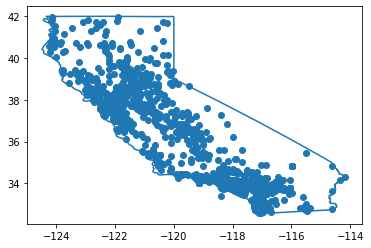

In [32]:
plt.scatter(combined['Longitude'],combined['Latitude'])
plt.plot(json_df['Longitude'],json_df['Latitude'])

plt.show()

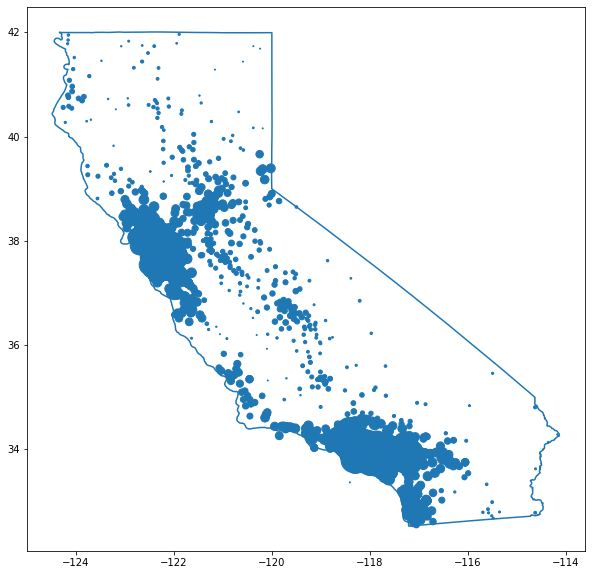

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined['Longitude'],combined['Latitude'],combined['Count'])
ax.plot(json_df['Longitude'],json_df['Latitude'])

plt.show()

In [42]:
Axes3D.bar(xs=combined['Latitude'],ys=combined['Longitude'])

plt.show()

TypeError: scatter() missing 1 required positional argument: 'self'

In [67]:
h

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

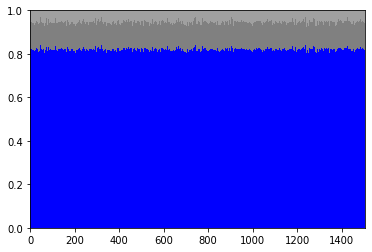

In [69]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf([combined['Longitude'],combined['Latitude']], levels=[10, 30, 50],
                 colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()